# Practica profecionalizante 3 - Final

El conjunto de datos se saco de kaggle y es el del [titanic](https://www.kaggle.com/datasets/shubhamgupta012/titanic-dataset)

## Introduccion.
En este notebook vamos a estar poniendo en practica los conpecto que se vieron a lo largo de la materia **Practica profecionaliante 3**, el trabajo se va a dividir en 2 etapas.
1. EDA
2. Modelado

Luego de eso, se presentaran las conclusiones finales.


## 1. EDA
El EDA (Análisis Exploratorio de Datos) es una metodología en el campo de la ciencia de datos que consiste en explorar, resumir y visualizar los datos para comprender su estructura, detectar patrones, identificar anomalías y generar ideas iniciales antes de aplicar modelos o algoritmos más complejos. En pocas palabras, es una etapa crucial en el proceso de análisis de datos que permite obtener una visión general y obtener información valiosa para tomar decisiones informadas.

In [ ]:
# Conexion con google drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importacion de las librerias que vamos a usar.
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Cargamos el conjunto de datos
df=pd.read_csv("/content/drive/MyDrive/5to semestre/Practicas 3/Final/data/SVMtrain.csv")
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...,...
884,887,0,2,Male,27.0,0,0,13.0000,3
885,888,1,1,female,19.0,0,0,30.0000,3
886,889,0,3,female,60.0,1,2,23.4500,3
887,890,1,1,Male,26.0,0,0,30.0000,1


In [ ]:
#Usamos info para saber como esta compuesto el df y para saber si cuenta con algun null en sus variables.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB


En esta parte vamos a mostrar lo siguiente:
* Cantidad de filas
* Cantidad de columnas
* Valores unicos por columna
* Significado de cada columna
* Ademas vamos a mostrar algunos datos estadisticos en las variables que correspondan, estos van a ser los siguientes:
  * Media
  * Min
  * 25%
  * 50%
  * 75%
  * max

In [1]:
print(f"Cantidad de filas: {df.shape[0]} ")
print(f"Cantidad de columnas: {df.shape[1]}")
print("-------------------------------------------------------")
print("Datos sobre las columnas: ")
print("")

data_for_graphic_1=[]

for column in list(df.columns):



  if column == 'Survived':
    data_for_graphic_1.append(len(list(df[column].unique())))
    print(column + ": " + str(len(list(df[column].unique()))) + ' esta es nuestra Y')
    print("Estado de supervivencia del pasajero (0 = No sobrevivio, 1 = Sobrevivio).")
    print('-----' * 5)

  elif column == 'PassengerId':
    print(column + ": " + str(len(list(df[column].unique()))))
    print("Identificador único para cada pasajero.")
    print('-----' * 5)

  elif column == 'Pclass':
    data_for_graphic_1.append(len(list(df[column].unique())))
    print(column + ": " + str(len(list(df[column].unique()))))
    print("Clase de pasajeros (1 = Primera clase, 2 = Segunda clase, 3 = Tercera clase).")
    print('-----' * 5)

  elif column == 'Age':
    data_for_graphic_1.append(len(list(df[column].unique())))
    print(column + ": " + str(len(list(df[column].unique()))))
    print("Edad del pasajero.")
    print(df.Age.describe())
    print('-----' * 5)

  elif column == 'SibSp':
    data_for_graphic_1.append(len(list(df[column].unique())))
    print(column + ": " + str(len(list(df[column].unique()))))
    print("Número de hermanos/cónyuges a bordo del Titanic.")
    print('-----' * 5)

  elif column == 'Parch':
    data_for_graphic_1.append(len(list(df[column].unique())))
    print(column + ": " + str(len(list(df[column].unique()))))
    print("Número de padres/hijos a bordo del Titanic.")
    print('-----' * 5)

  elif column == 'Fare':
    data_for_graphic_1.append(len(list(df[column].unique())))
    print(column + ": " + str(len(list(df[column].unique()))))
    print("Tarifa pagada por el pasajero.")
    print(df.Fare.describe())
    print('-----' * 5)

  elif column == 'Embarked':
    data_for_graphic_1.append(len(list(df[column].unique())))
    print(column + ": " + str(len(list(df[column].unique()))))
    print("Puerto de embarque (C = Cherburgo, Q = Queenstown, S = Southampton).")
    print('-----' * 5)

  else:
    data_for_graphic_1.append(len(list(df[column].unique())))
    print(column + ": " + str(len(list(df[column].unique()))))
    print("Género del pasajero.")
    print('-----' * 5)

NameError: ignored

In [ ]:
# Generamos un grafico con el resultado anterior.
columns = list(df.columns)
del columns[0]
fig = px.bar( y=data_for_graphic_1, x= columns, text_auto='.2s',
            title="Cantidad de valores únicos por columna.")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [ ]:
df = df.drop(['PassengerId'], axis=1)
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Male,22.0,1,0,7.25,3


### Anova

Para este data set solamente podemos aplicar Anova a 2 de sus columnas porque son las unicas que cumplen con los requisitos de ser valores numericos contra categoricos. Para el resto de las columnas no aplica.


<Axes: title={'center': 'Figura 2 Fare'}, xlabel='Fare', ylabel='unos'>

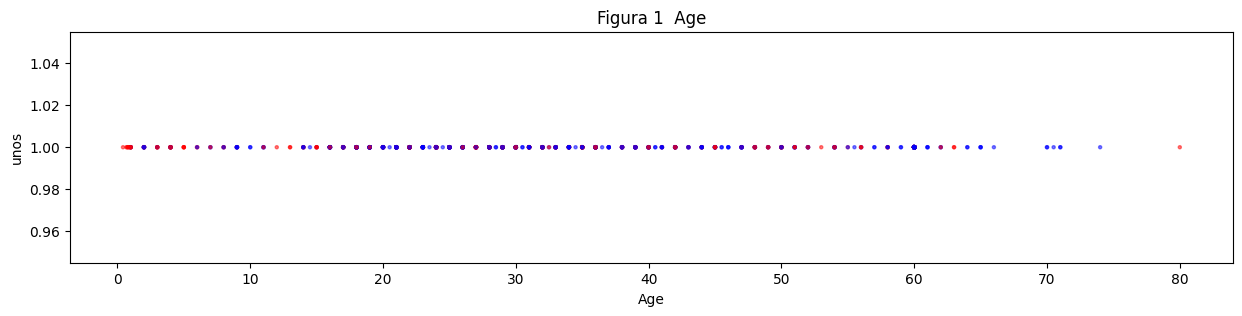

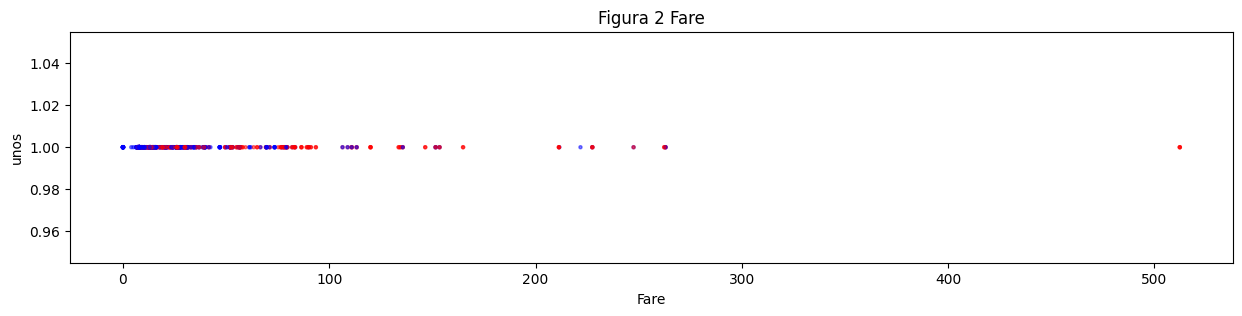

In [ ]:
q_observaciones=df.shape[0]
unos=np.ones(q_observaciones)
df['unos']=unos     # agrego una columna auxiliar a df formada por unos, sólo para poder asignar una
                    # altura vertical en el siguiente gráfico. Luego la quitaremos

# Asigaremos el color rojo a las observaciones A, azul a las B y verde a las C:
colores=np.where(df.Survived==1, 'red', np.where(df.Survived==0, 'blue','green'))

df.plot.scatter('Age','unos', c=colores, figsize=(15, 3), s=5, alpha=0.5, title='Figura 1  Age')
df.plot.scatter('Fare','unos', c=colores, figsize=(15, 3), s=5, alpha=0.5, title='Figura 2 Fare')

In [ ]:
# Eliminemos esa columna auxiliar de unos antes que hagamos lío.
df=df.drop('unos', axis='columns')   # elimino la columna de unos

In [ ]:
x1A=df.Age[df.Survived==1]
df1A=pd.DataFrame(x1A)
df1A.columns=['Age']

x1B=df.Age[df.Survived==0]
df1B=pd.DataFrame(x1B)
df1B.columns=['Age']

<Axes: title={'center': 'Figura 5'}, ylabel='Density'>

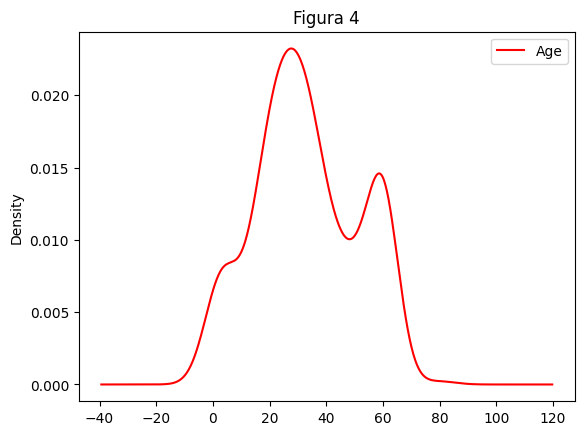

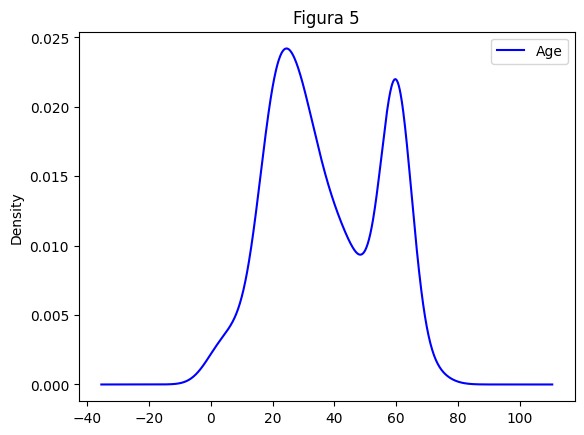

In [ ]:
df1A.plot.kde(color='red', title='Figura 4')
df1B.plot.kde(color='blue', title='Figura 5')

In [ ]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Male,22.0,1,0,7.25,3


In [ ]:
x1A=df.Fare[df.Survived==1]
df1A=pd.DataFrame(x1A)
df1A.columns=['Fare']

x1B=df.Fare[df.Survived==0]
df1B=pd.DataFrame(x1B)
df1B.columns=['Fare']

<Axes: title={'center': 'Figura 7'}, ylabel='Density'>

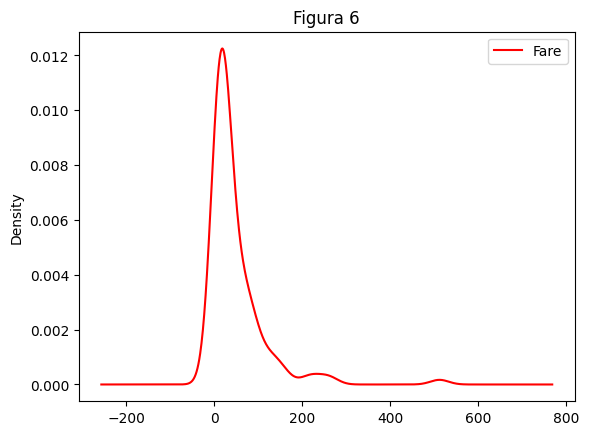

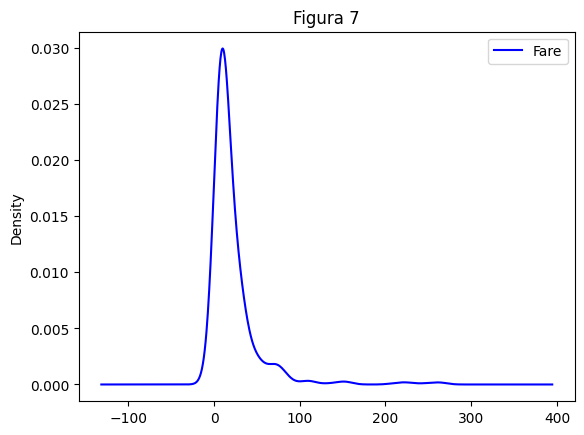

In [ ]:
df1A.plot.kde(color='red', title='Figura 6')
df1B.plot.kde(color='blue', title='Figura 7')

### Mutual information.

In [ ]:
df1 = df
df1['Sex_numeric'] = df['Sex'].map({'Male': 0, 'female': 1})
df1=df1.drop('Sex', axis='columns')

In [ ]:
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_numeric
0,0,3,22.0,1,0,7.2500,3,0
1,1,1,38.0,1,0,71.2833,1,1
2,1,3,26.0,0,0,7.9250,3,1
3,1,1,35.0,1,0,53.1000,3,1
4,0,3,35.0,0,0,8.0500,3,0


In [ ]:
for x1 in df1.columns:
  variable=np.array(df1[x1]).reshape(-1, 1)  # por el formato necesario para que lo tome correctamente
  MI=mutual_info_classif(variable,df1["Survived"],discrete_features='auto', n_neighbors=3, copy=True, random_state=123)
  print("----------------------------------------------------------------------------")
  if MI[0] > 0.05:
      print(f"MI {x1} > 0 : ", MI, "Existe relación entre las variables" )
  else:
      print(f"MI {x1} = 0 : ", MI, "NO existe relación entre las variables" )

----------------------------------------------------------------------------
MI Survived > 0 :  [0.66581461] Existe relación entre las variables
----------------------------------------------------------------------------
MI Pclass > 0 :  [0.0849883] Existe relación entre las variables
----------------------------------------------------------------------------
MI Age = 0 :  [0.03570622] NO existe relación entre las variables
----------------------------------------------------------------------------
MI SibSp = 0 :  [0.02822766] NO existe relación entre las variables
----------------------------------------------------------------------------
MI Parch = 0 :  [0.04547656] NO existe relación entre las variables
----------------------------------------------------------------------------
MI Fare > 0 :  [0.14682865] Existe relación entre las variables
----------------------------------------------------------------------------
MI Embarked = 0 :  [0.01102804] NO existe relación entre las v

### PCA

In [ ]:
sobrevive = df.Survived
df2 = df1.drop(columns=["Survived"])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

In [ ]:
pca.fit(df2)

PCA(n_components=4)

In [ ]:
pca.components_

array([[-0.00920715, -0.00135425,  0.00357602,  0.00353376,  0.99993606,
        -0.00360656,  0.00172997],
       [-0.0058686 ,  0.99986702, -0.00975528, -0.00976888,  0.00135398,
        -0.00562285, -0.00272923],
       [ 0.17942337,  0.01440566,  0.89123585,  0.39773464, -0.00260264,
         0.11228381,  0.04991102],
       [-0.00885692, -0.00396095,  0.1053378 ,  0.03412057, -0.00432814,
        -0.98839402,  0.10346076]])

In [ ]:
pca.explained_variance_ratio_

array([8.85816703e-01, 1.13097822e-01, 4.78247847e-04, 2.07771583e-04])

In [ ]:
sum(pca.explained_variance_ratio_)

0.9996005444911508

In [ ]:
X = pca.transform(df2)
df3 = pd.concat([pd.DataFrame(X),sobrevive],axis=1)
df3

,0,1,2,3,Survived
0,-24.834828,-13.724777,0.297620,-0.302760,0
1,39.200067,2.380048,-0.172049,1.454683,1
2,-24.167134,-9.717369,-0.487839,-0.323402,1
3,21.014779,-0.655418,0.056627,-0.431523,1
4,-24.056061,-0.715668,-0.408425,-0.463053,0
...,...,...,...,...,...
884,-19.086336,-8.702033,-0.715976,-0.443932,0
885,-2.065652,-16.674812,-1.004979,-0.373505,1
886,-8.678528,24.269837,1.648252,-0.351690,0
887,-2.069649,-9.661768,-1.178618,1.472095,1


## 2. Modelado

In [ ]:
# Separamos en x e y
X = df1.drop(columns=["Survived"])
y = df1.Survived

In [ ]:
# Aramos el train y el test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print("Conjunto de datos luego de su separacion, con cantidad de variables.")
print(f"train X: {len(X_train)} ")
print(f"train Y: {len(y_train)} ")
print(f"test X: {len(X_test)} ")
print(f"test Y: {len(y_test)} ")

Conjunto de datos luego de su separacion, con cantidad de variables.
train X: 711 
train Y: 711 
test X: 178 
test Y: 178 


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
lr = modelo.score(X_test,y_test)
lr

0.7921348314606742

In [ ]:
# Random Forest
for x in range(100,1000, 100):
  rf=RandomForestClassifier(n_jobs=-1, random_state=123, n_estimators= x)
  rf.fit(X_train, y_train)
  if rf.score(X_test,y_test) >= lr:
    print(f"Random Forest con {x} arboles. ")
    print(f"Score: {rf.score(X_test,y_test)}")
    print('---------------' * 3)
    print('')
  else:
    print(f"Random Forest con {x} no supero la Logistic Regression")

Random Forest con 100 no supero la Logistic Regression
Random Forest con 200 no supero la Logistic Regression
Random Forest con 300 no supero la Logistic Regression
Random Forest con 400 no supero la Logistic Regression
Random Forest con 500 no supero la Logistic Regression
Random Forest con 600 no supero la Logistic Regression
Random Forest con 700 no supero la Logistic Regression
Random Forest con 800 no supero la Logistic Regression
Random Forest con 900 no supero la Logistic Regression


In [ ]:
# kNN
for x in range(2,11):
  knn=KNeighborsClassifier(n_jobs=-1, n_neighbors = x)
  knn.fit(X_train, y_train)
  if knn.score(X_test,y_test) >= lr:
    print(f"kNN con {x} vecinos. ")
    print(f"Score: {knn.score(X_test,y_test)}")
    print('---------------' * 3)
    print('')
  else:
    print(f"kNN con {x} vecinos no supero la Logistic Regression")

kNN con 2 vecinos no supero la Logistic Regression
kNN con 3 vecinos no supero la Logistic Regression
kNN con 4 vecinos no supero la Logistic Regression
kNN con 5 vecinos no supero la Logistic Regression
kNN con 6 vecinos no supero la Logistic Regression
kNN con 7 vecinos no supero la Logistic Regression
kNN con 8 vecinos no supero la Logistic Regression
kNN con 9 vecinos no supero la Logistic Regression
kNN con 10 vecinos no supero la Logistic Regression
